In [1]:
import copy
import sre_parse
import sre_constants
from random import Random
from importlib import reload
from dataclasses import asdict
from typing import Tuple
from collections import defaultdict, Counter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import Path as MarkerPath
from matplotlib.transforms import Affine2D
from matplotlib.collections import PatchCollection
import seaborn as sns
from ipywidgets import Accordion, HTML, VBox, HBox, Output, Button, Layout, Dropdown, Tab, Widget, GridBox, Text
from ipywidgets import Label, GridspecLayout
from tqdm import tqdm

In [53]:
import constants
reload(constants)
import solver
reload(solver)

<module 'solver' from '/data/Development/regex_crossword/solver.py'>

In [54]:
def close_all_figures():
    for manager in matplotlib._pylab_helpers.Gcf.get_all_fig_managers():
        plt.close(manager.canvas.figure)
close_all_figures()

%config InlineBackend.close_figures=True 
plt.ion()

In [55]:
strings = solver.build_strings()
len(strings)

39

In [56]:
strings_df = pd.DataFrame([
    {'axis': s.name[0],
     'name': s.name,
     'pattern': s.pattern.raw,
     'size': s.size}
    for s in strings])
strings_df

axis name                   pattern  size
0     y   y0                  .(C|HH)*     7
1     y   y1                    R*D*M*     8
2     y   y2               N.*X.X.X.*E     9
3     y   y3               (RR|HHH)*.?    10
4     y   y4               ([^X]|XCC)*    11
5     y   y5                 (...?)\1*    12
6     y   y6           [^C]*[^R]*III.*    13
7     y   y7             C*MC(CCC|MM)*    12
8     y   y8                        .*    11
9     y   y9               (O|RHH|MM)*    10
10    y  y10           F.*[AO].*[AO].*     9
11    y  y11            (DI|NS|TH|OM)*     8
12    y  y12                  .*H.*H.*     7
13    x   x0           [^X]*(DN|TE|NI)     7
14    x   x1       [RONMHC]*I[RONMHC]*     8
15    x   x2                .*(..)\1P+     9
16    x   x3                (E|RC|NM)*    10
17    x   x4            ([^MC]|MM|CC)*    11
18    x   x5            R?(CR)*MC[MA]*    12
19    x   x6                        .*    13
20    x   x7              .*CDD.*RRP.*    12
21    x   x8              (XHH|[^XH])*    11
22    x   x9              ([^CME]|ME)*    10
23    x  x10                   .*RXO.*     9
24    x  x11                .*LR.*RL.*     8
25    x  x12                .*EU.*ES.*     7
26    z   z0               .*H.*V.*G.*     7
27    z   z1                     [RC]*     8
28    z   z2                   M*XEX.*     9
29    z   z3               .*MCC.*DD.*    10
30    z   z4               .*X.*RCHX.*    11
31    z   z5  .*(.)(.)(.)(.)\4\3\2\1.*    12
32    z   z6              (NI|ES|IH).*    13
33    z   z7             [^C]*MMM[^C]*    12
34    z   z8             .*(.)X\1C\1.*    11
35    z   z9        [ROMEA]*HO[UMIEC]*    10
36    z  z10                (XR|[^R])*     9
37    z  z11               [^M]*M[^M]*     8
38    z  z12               (S|MM|HHH)*     7

In [7]:
def widget_container(container_type, *labeled_children: Tuple[str, Widget]):
    titles, children = zip(*labeled_children)
    accordion = container_type(children)
    for i, t in enumerate(titles):
        accordion.set_title(i, t)
    return accordion

In [5]:
widgets = []
with tqdm(strings) as t:
    for s in t:
        ps = list(s.gen_possible())
        output = Output()
        with output:
            display(asdict(s.pattern.re))
            print('Size', s.size)
            print('Span', s.pattern.re.span())
            print('Possible Matches')
            for m in ps:
                print(' ', m.chr_seq)
        widgets.append((f'{s.pattern.raw} sz={s.size} ps={len(ps)}', output))
    
widget_container(Accordion, *widgets)

100%|██████████| 39/39 [00:02<00:00, 17.24it/s]


NameError: name 'widget_container' is not defined

In [302]:
%config InlineBackend.close_figures=False 
plt.ioff()
close_all_figures()

widgets = []
with tqdm(pd.Series(strings, dtype=object).sample(15, random_state=0xCAFE)) as t:
    for s in t:
        solution = next(iter(solver.Solution.generate_solutions(s)))
        output = Output()
        with output:
            f = plt.figure(figsize=(14, 14))
            ax = f.add_subplot(111)
            solver.draw_puzzle(ax=ax, fontsize=15, solution=solution)
            display(f)
        widgets.append((f'{s.pattern.raw} sz={s.size} {s.name}', output))
        
widget_container(Accordion, *widgets)

100%|██████████| 15/15 [00:04<00:00,  3.33it/s]


Accordion(children=(Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), Output(), …

In [8]:
%config InlineBackend.close_figures=True 
plt.ion()
close_all_figures()

In [57]:
random = Random(0xCAFE)
with tqdm(strings) as t:
    string_solutions = [solver.SolutionSet.for_string(s, random) for s in t]

100%|██████████| 39/39 [00:00<00:00, 40.96it/s]


In [58]:
string_solutions_df = pd.Series([len(s) for s in string_solutions],
                                strings_df['name'], name='count').reset_index()
string_solutions_df

name  count
0    y0     13
1    y1     45
2    y2      3
3    y3     12
4    y4     41
5    y5      2
6    y6     66
7    y7     27
8    y8      1
9    y9    274
10  y10     28
11  y11    256
12  y12     21
13   x0      3
14   x1      8
15   x2      5
16   x3    683
17   x4   1365
18   x5     11
19   x6      1
20   x7     28
21   x8     41
22   x9     89
23  x10      7
24  x11     15
25  x12     10
26   z0     35
27   z1      1
28   z2      7
29   z3     21
30   z4     28
31   z5      5
32   z6      3
33   z7     10
34   z8      7
35   z9      9
36  z10     55
37  z11      8
38  z12     44

In [59]:
reduced = solver.multi_reduce_solution_sets_by_lowest_estimated_count(string_solutions, random)

estimating intersection (0,1): 100%|██████████| 1/1 [00:00<00:00, 35.74it/s]


In [60]:
len(reduced)

7

In [62]:
reduced.sort(key=lambda ss: len(ss.cell_indices))
reduced

[<SolutionSet x3, y11 cells=17 (sols =5,440)>,
 <SolutionSet y6, z10 cells=21 (sols =2,760)>,
 <SolutionSet x4, x6, z0, z3 cells=37 (sols =488,370)>,
 <SolutionSet x2, y12, y9, z12, z7 cells=38 (sols =394,983)>,
 <SolutionSet x10, x11, x8, y0, z9 cells=39 (sols =7,080)>,
 <SolutionSet x7, y10, y2, z11, z4 cells=43 (sols =81,928)>,
 <SolutionSet x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1, z2, z5, z6, z8 cells=101 (sols =5,592)>]

<SolutionSet x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1, z2, z5, z6, z8 cells=101 (sols =5,592)>

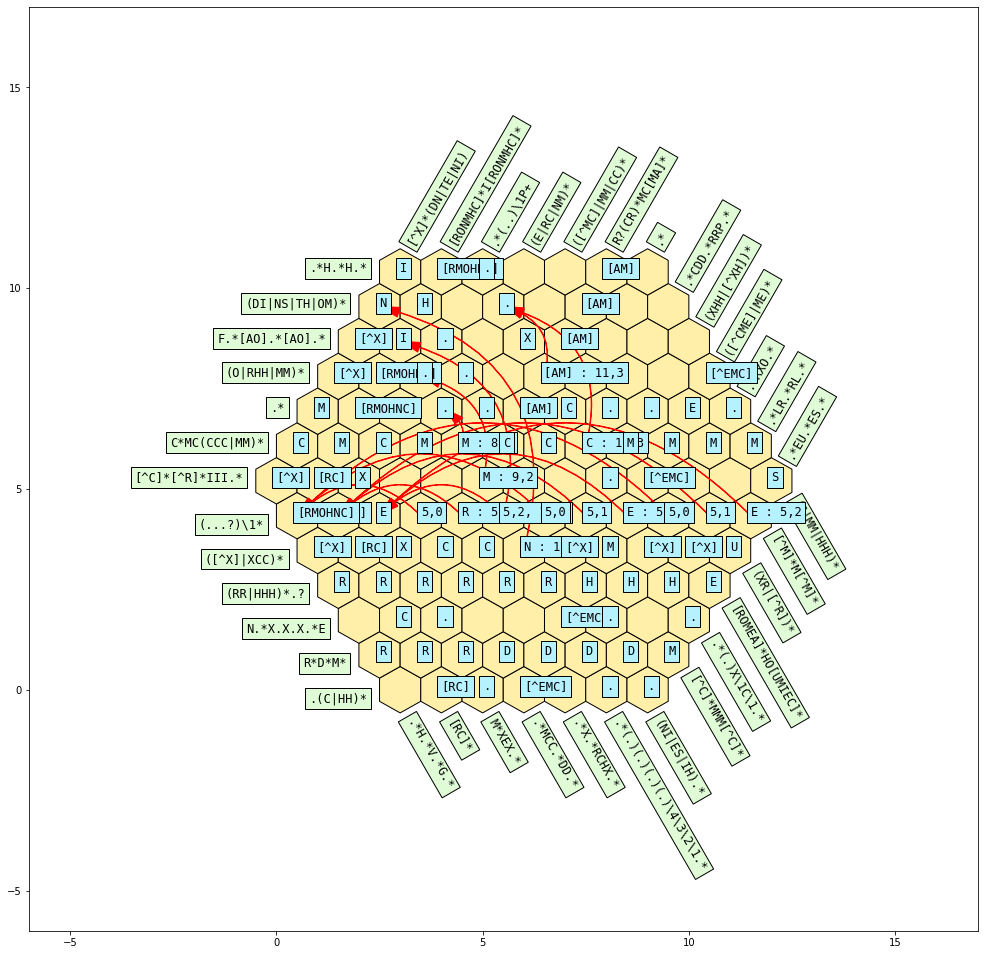

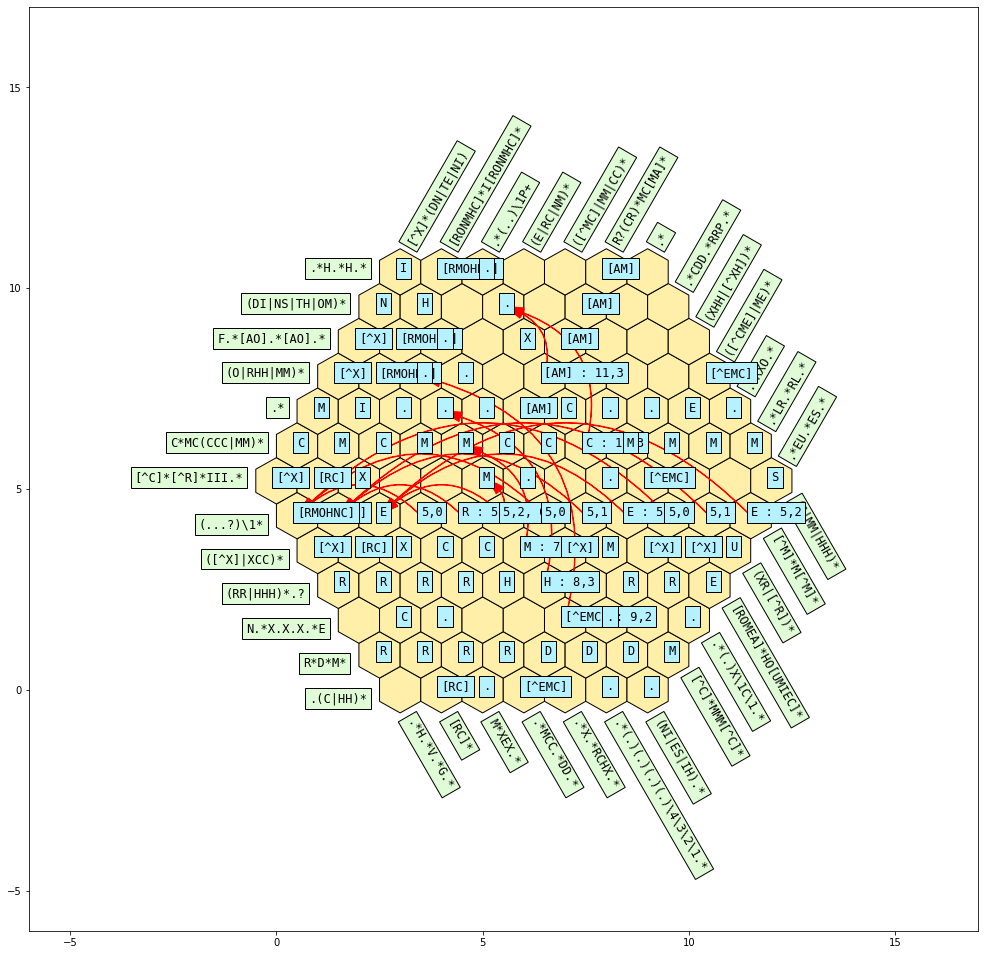

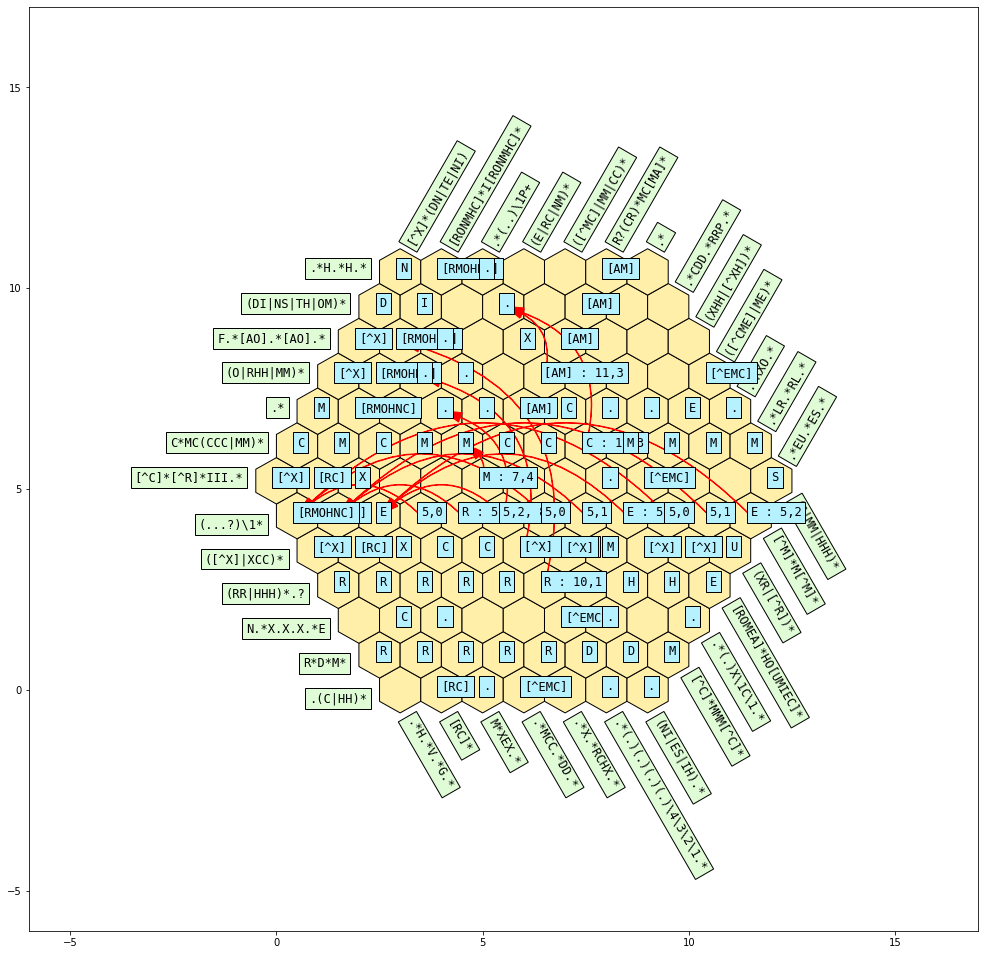

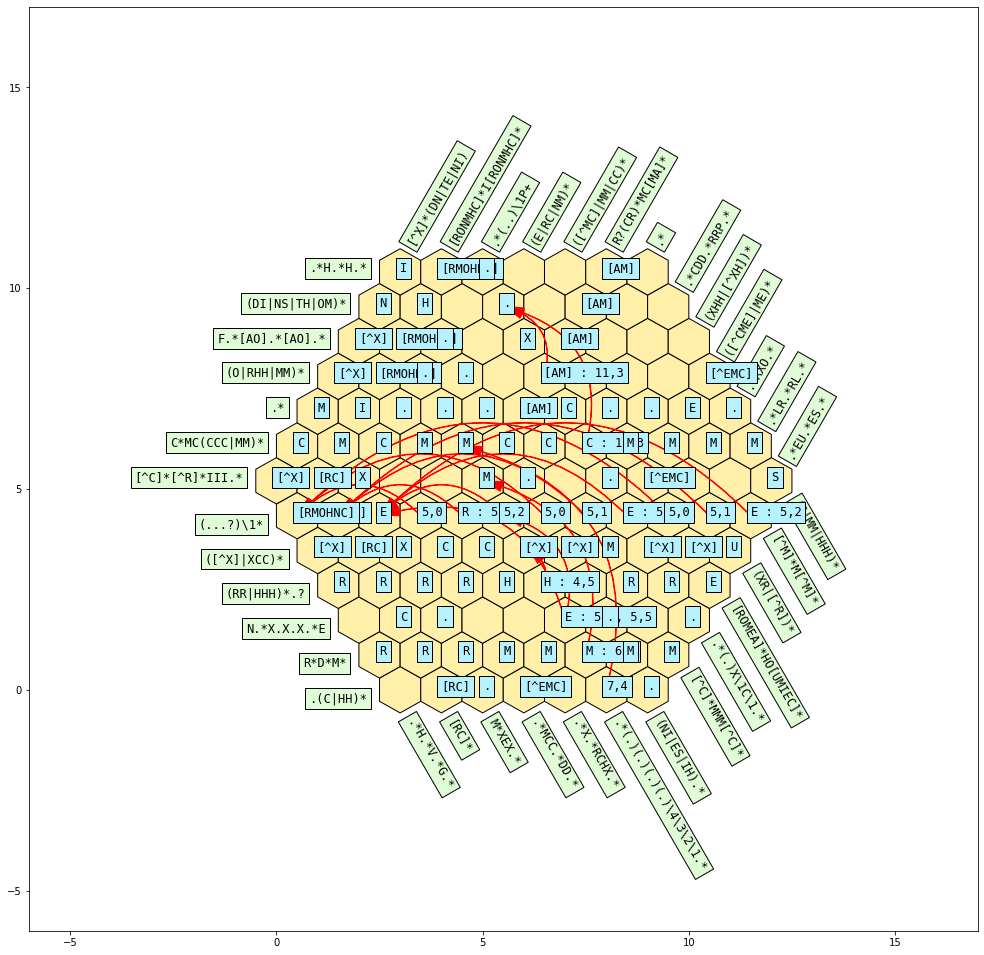

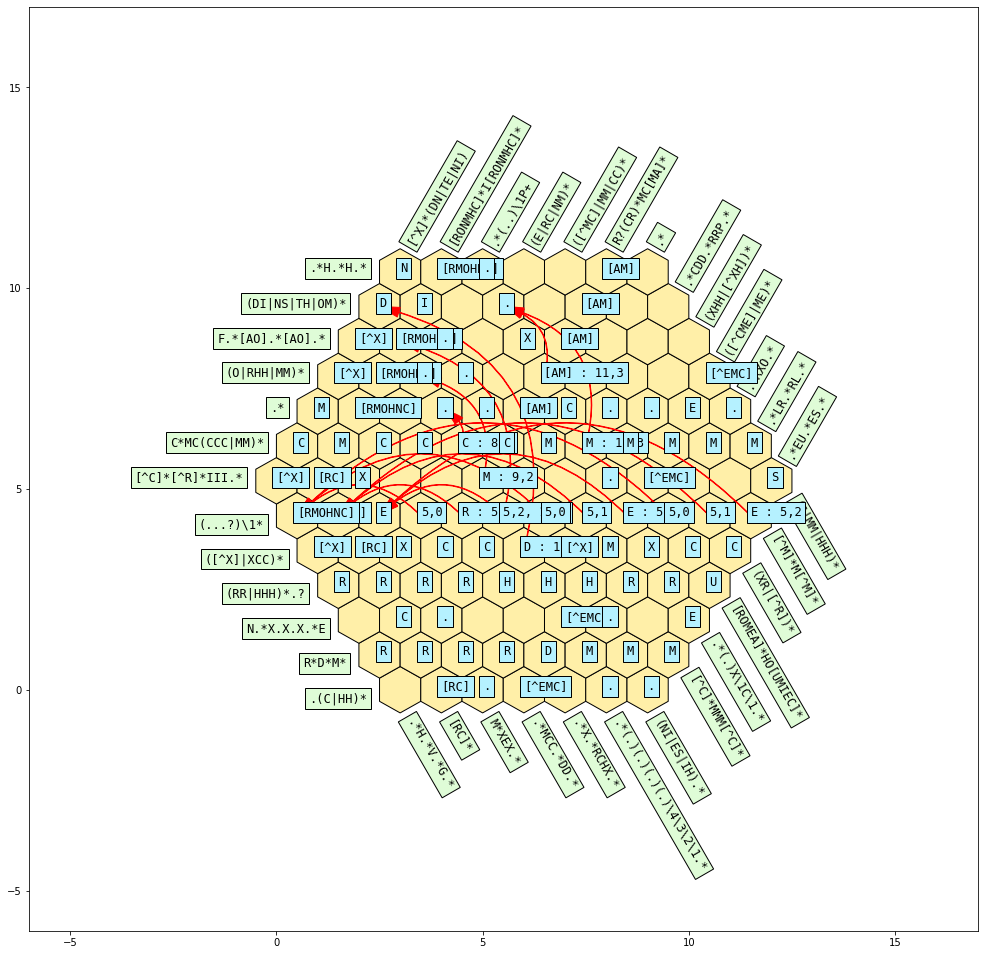

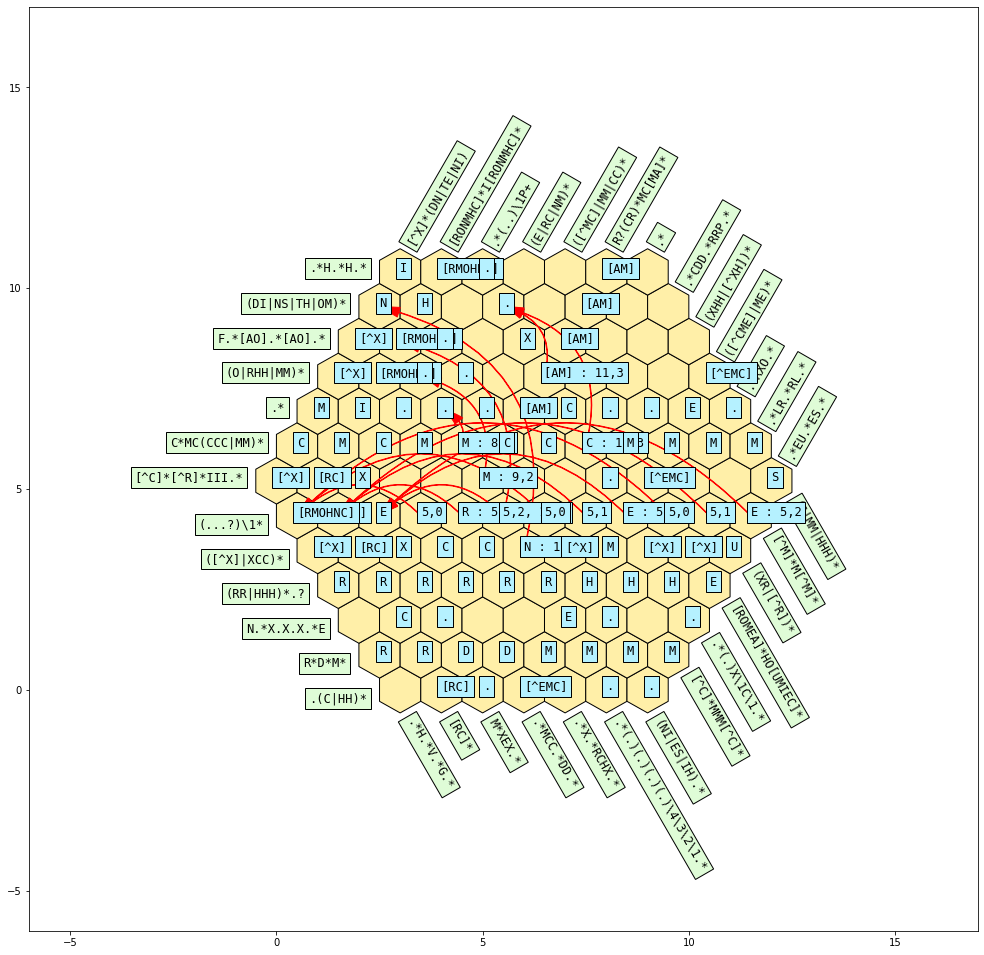

In [63]:
ss = reduced[-1]
display(ss)
for solution in pd.Series(list(ss)).sample(6, random_state=0xCAFE):
    solver.draw_puzzle(fig_size=17, fontsize=12, solution=solution)

In [48]:
a,b = pd.Series(list(ss)).sample(2, random_state=0xCAFE + 0)
print(len(ss.cell_indices), sum(1 for ix in ss.cell_indices if a.cells[ix] == b.cells[ix]))
{ix:[a.cells[ix].label(), b.cells[ix].label()] for ix in ss.cell_indices if a.cells[ix] != b.cells[ix]}

17 9


{(11, 1): ['H', 'M'],
 (11, 7): ['H', 'S'],
 (9, 3): ['C', 'E'],
 (11, 0): ['T', 'O'],
 (11, 6): ['T', 'N'],
 (8, 3): ['R', 'E'],
 (4, 1): ['R', 'E'],
 (5, 2): ['C', 'E']}

In [51]:
a

<SolutionSet x4, x6, z0, z3 (sols =488,370)>

In [52]:
b

<SolutionSet x2, y12, y9, z12, z7 (sols =394,983)>

In [50]:
a, b, *rest = sorted(reduced, key=len, reverse=True)
a.estimate_intersection_size(b, random, 250)

19601507692.89936

In [94]:
len(a.intersection(b))

441

In [31]:
n_cells = sum(solver.row_size(i) for i in range(constants.size))
n_cells

127

In [99]:
overlap.min().idxmin()

'y3'

In [102]:
overlap['y3'].idxmin()

'z1'

In [103]:
solutions_by_name = {ss.names_str:ss for ss in string_solutions}
a = solutions_by_name['y3']
b = solutions_by_name['z1']
print(a.estimate_intersection_size(b, random))
print(len(a.intersection(b)))

84.0
7


In [119]:
solution_sets = list(reduced)
n = len(solution_sets)
indexes = ((i, j) for i in range(n) for j in range(i + 1, n))
i, j = min(indexes, key=lambda x: solution_sets[x[0]].estimate_intersection_size(solution_sets[x[1]], random))

In [120]:
i,j

(14, 15)

In [121]:
a = solution_sets[i]
b = solution_sets[j]
len(a), len(b)

(168, 73728)

In [134]:
size_estimates = pd.DataFrame([
    {'sample_size': sample_size,
     'estimate': a.estimate_intersection_size(b, random, sample_size=sample_size),
     'trial': i}
    for sample_size in [25, 100, 200]
    for i in range(25)])
size_estimates

sample_size    estimate  trial
0            25      0.0000      0
1            25      0.0000      1
2            25  39636.1728      2
3            25  19818.0864      3
4            25  59454.2592      4
..          ...         ...    ...
70          200   9599.3856     20
71          200  10218.7008     21
72          200   7431.7824     22
73          200   7122.1248     23
74          200   6502.8096     24

[75 rows x 3 columns]

In [138]:
best_size_estimate = ((size_estimates['estimate'] * size_estimates['sample_size']).sum() /
                       size_estimates['sample_size'].sum())
best_size_estimate

8735.202697846154

In [139]:
best_size_estimate / len(a) / len(b)

0.0007052307692307692

sample_size
25     AxesSubplot(0.125,0.125;0.775x0.755)
100    AxesSubplot(0.125,0.125;0.775x0.755)
200    AxesSubplot(0.125,0.125;0.775x0.755)
Name: estimate, dtype: object

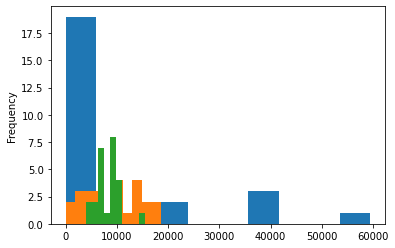

In [136]:
size_estimates.groupby('sample_size')['estimate'].plot.hist()

In [65]:
sss = reduced
names = [ss.names_str for ss in sss]
n = len(sss)
overlap = np.zeros((n,n), dtype=float)
for i in range(n):
    overlap[i,i] = np.nan
with tqdm(total=n*(n-1)//2) as progress:
    for i in range(n):
        for j in range(i+1, n):
            progress.set_description(f'estimating intersection ({i},{j})', refresh=False)
            progress.update()
            overlap[i,j] = overlap[j,i] = sss[i].estimate_intersection_size(
                sss[j], random, 400, rate_floor_clamp=0)

overlap = pd.DataFrame(overlap, index=names, columns=names)
overlap

estimating intersection (5,6): 100%|██████████| 21/21 [00:29<00:00,  1.39s/it]


x3, y11  \
x3, y11                                                      NaN   
y6, z10                                             4.128397e+06   
x4, x6, z0, z3                                      2.065942e+08   
x2, y12, y9, z12, z7                                2.269572e+06   
x10, x11, x8, y0, z9                                7.240858e+06   
x7, y10, y2, z11, z4                                9.583413e+07   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...  0.000000e+00   

                                                         y6, z10  \
x3, y11                                             4.128397e+06   
y6, z10                                                      NaN   
x4, x6, z0, z3                                      6.092766e+08   
x2, y12, y9, z12, z7                                2.462111e+08   
x10, x11, x8, y0, z9                                4.409137e+06   
x7, y10, y2, z11, z4                                2.916117e+07   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...  5.772286e+05   

                                                    x4, x6, z0, z3  \
x3, y11                                               2.065942e+08   
y6, z10                                               6.092766e+08   
x4, x6, z0, z3                                                 NaN   
x2, y12, y9, z12, z7                                  2.292109e+10   
x10, x11, x8, y0, z9                                  1.074878e+09   
x7, y10, y2, z11, z4                                  4.480252e+09   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...    1.331345e+06   

                                                    x2, y12, y9, z12, z7  \
x3, y11                                                     2.269572e+06   
y6, z10                                                     2.462111e+08   
x4, x6, z0, z3                                              2.292109e+10   
x2, y12, y9, z12, z7                                                 NaN   
x10, x11, x8, y0, z9                                        7.188700e+07   
x7, y10, y2, z11, z4                                        5.582129e+08   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...          0.000000e+00   

                                                    x10, x11, x8, y0, z9  \
x3, y11                                                     7.240858e+06   
y6, z10                                                     4.409137e+06   
x4, x6, z0, z3                                              1.074878e+09   
x2, y12, y9, z12, z7                                        7.188700e+07   
x10, x11, x8, y0, z9                                                 NaN   
x7, y10, y2, z11, z4                                        4.828556e+07   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...          2.152780e+04   

                                                    x7, y10, y2, z11, z4  \
x3, y11                                                     9.583413e+07   
y6, z10                                                     2.916117e+07   
x4, x6, z0, z3                                              4.480252e+09   
x2, y12, y9, z12, z7                                        5.582129e+08   
x10, x11, x8, y0, z9                                        4.828556e+07   
x7, y10, y2, z11, z4                                                 NaN   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...          0.000000e+00   

                                                    x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1, z2, z5, z6, z8  
x3, y11                                                                                         0.000                
y6, z10                                                                                    577228.608                
x4, x6, z0, z3                                                                            1331345.457                
x2, y12, y9, z12, z7                                                                            0.000      

In [66]:
ns = np.array([len(ss) for ss in sss])
max_overlap = ns[::, None] * ns[None, ::]
max_overlap = pd.DataFrame(max_overlap, index=names, columns=names)
max_overlap

x3, y11     y6, z10  \
x3, y11                                               29593600    15014400   
y6, z10                                               15014400     7617600   
x4, x6, z0, z3                                      2656732800  1347901200   
x2, y12, y9, z12, z7                                2148707520  1090153080   
x10, x11, x8, y0, z9                                  38515200    19540800   
x7, y10, y2, z11, z4                                 445688320   226121280   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...    30420480    15433920   

                                                    x4, x6, z0, z3  \
x3, y11                                                 2656732800   
y6, z10                                                 1347901200   
x4, x6, z0, z3                                        238505256900   
x2, y12, y9, z12, z7                                  192897847710   
x10, x11, x8, y0, z9                                    3457659600   
x7, y10, y2, z11, z4                                   40011177360   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...      2730965040   

                                                    x2, y12, y9, z12, z7  \
x3, y11                                                       2148707520   
y6, z10                                                       1090153080   
x4, x6, z0, z3                                              192897847710   
x2, y12, y9, z12, z7                                        156011570289   
x10, x11, x8, y0, z9                                          2796479640   
x7, y10, y2, z11, z4                                         32360167224   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...            2208744936   

                                                    x10, x11, x8, y0, z9  \
x3, y11                                                         38515200   
y6, z10                                                         19540800   
x4, x6, z0, z3                                                3457659600   
x2, y12, y9, z12, z7                                          2796479640   
x10, x11, x8, y0, z9                                            50126400   
x7, y10, y2, z11, z4                                           580050240   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...              39591360   

                                                    x7, y10, y2, z11, z4  \
x3, y11                                                        445688320   
y6, z10                                                        226121280   
x4, x6, z0, z3                                               40011177360   
x2, y12, y9, z12, z7                                         32360167224   
x10, x11, x8, y0, z9                                           580050240   
x7, y10, y2, z11, z4                                          6712197184   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...             458141376   

                                                    x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1, z2, z5, z6, z8  
x3, y11                                                                                      30420480                
y6, z10                                                                                      15433920                
x4, x6, z0, z3                                                                             2730965040                
x2, y12, y9, z12, z7                                                                       2208744936                
x10, x11, x8, y0, z9                                                                         39591360                
x7, y10, y2, z11, z4                                                                        458141376                
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...                                           31270464

In [67]:
overlap / max_overlap

x3, y11   y6, z10  \
x3, y11                                                  NaN  0.274962   
y6, z10                                             0.274962       NaN   
x4, x6, z0, z3                                      0.077762  0.452019   
x2, y12, y9, z12, z7                                0.001056  0.225850   
x10, x11, x8, y0, z9                                0.188000  0.225637   
x7, y10, y2, z11, z4                                0.215025  0.128963   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...  0.000000  0.037400   

                                                    x4, x6, z0, z3  \
x3, y11                                                   0.077762   
y6, z10                                                   0.452019   
x4, x6, z0, z3                                                 NaN   
x2, y12, y9, z12, z7                                      0.118825   
x10, x11, x8, y0, z9                                      0.310869   
x7, y10, y2, z11, z4                                      0.111975   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...        0.000487   

                                                    x2, y12, y9, z12, z7  \
x3, y11                                                         0.001056   
y6, z10                                                         0.225850   
x4, x6, z0, z3                                                  0.118825   
x2, y12, y9, z12, z7                                                 NaN   
x10, x11, x8, y0, z9                                            0.025706   
x7, y10, y2, z11, z4                                            0.017250   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...              0.000000   

                                                    x10, x11, x8, y0, z9  \
x3, y11                                                         0.188000   
y6, z10                                                         0.225637   
x4, x6, z0, z3                                                  0.310869   
x2, y12, y9, z12, z7                                            0.025706   
x10, x11, x8, y0, z9                                                 NaN   
x7, y10, y2, z11, z4                                            0.083244   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...              0.000544   

                                                    x7, y10, y2, z11, z4  \
x3, y11                                                         0.215025   
y6, z10                                                         0.128963   
x4, x6, z0, z3                                                  0.111975   
x2, y12, y9, z12, z7                                            0.017250   
x10, x11, x8, y0, z9                                            0.083244   
x7, y10, y2, z11, z4                                                 NaN   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...              0.000000   

                                                    x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1, z2, z5, z6, z8  
x3, y11                                                                                      0.000000                
y6, z10                                                                                      0.037400                
x4, x6, z0, z3                                                                               0.000487                
x2, y12, y9, z12, z7                                                                         0.000000                
x10, x11, x8, y0, z9                                                                         0.000544                
x7, y10, y2, z11, z4                                                                         0.000000                
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...                                                NaN

<AxesSubplot:ylabel='Frequency'>

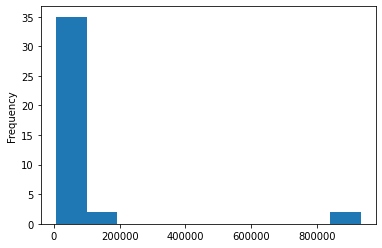

In [85]:
overlap.max().plot.hist()

<AxesSubplot:ylabel='Frequency'>

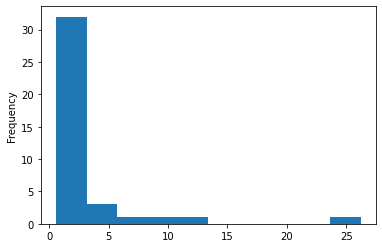

In [84]:
overlap.min().plot.hist()

In [73]:
pd.c

x3, y11  \
x3, y11                                                      NaN   
y6, z10                                             4.128397e+06   
x4, x6, z0, z3                                      2.065942e+08   
x2, y12, y9, z12, z7                                2.269572e+06   
x10, x11, x8, y0, z9                                7.240858e+06   
x7, y10, y2, z11, z4                                9.583413e+07   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...  0.000000e+00   

                                                         y6, z10  \
x3, y11                                             4.128397e+06   
y6, z10                                                      NaN   
x4, x6, z0, z3                                      6.092766e+08   
x2, y12, y9, z12, z7                                2.462111e+08   
x10, x11, x8, y0, z9                                4.409137e+06   
x7, y10, y2, z11, z4                                2.916117e+07   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...  5.772286e+05   

                                                    x4, x6, z0, z3  \
x3, y11                                               2.065942e+08   
y6, z10                                               6.092766e+08   
x4, x6, z0, z3                                                 NaN   
x2, y12, y9, z12, z7                                  2.292109e+10   
x10, x11, x8, y0, z9                                  1.074878e+09   
x7, y10, y2, z11, z4                                  4.480252e+09   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...    1.331345e+06   

                                                    x2, y12, y9, z12, z7  \
x3, y11                                                     2.269572e+06   
y6, z10                                                     2.462111e+08   
x4, x6, z0, z3                                              2.292109e+10   
x2, y12, y9, z12, z7                                                 NaN   
x10, x11, x8, y0, z9                                        7.188700e+07   
x7, y10, y2, z11, z4                                        5.582129e+08   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...          0.000000e+00   

                                                    x10, x11, x8, y0, z9  \
x3, y11                                                     7.240858e+06   
y6, z10                                                     4.409137e+06   
x4, x6, z0, z3                                              1.074878e+09   
x2, y12, y9, z12, z7                                        7.188700e+07   
x10, x11, x8, y0, z9                                                 NaN   
x7, y10, y2, z11, z4                                        4.828556e+07   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...          2.152780e+04   

                                                    x7, y10, y2, z11, z4  \
x3, y11                                                     9.583413e+07   
y6, z10                                                     2.916117e+07   
x4, x6, z0, z3                                              4.480252e+09   
x2, y12, y9, z12, z7                                        5.582129e+08   
x10, x11, x8, y0, z9                                        4.828556e+07   
x7, y10, y2, z11, z4                                                 NaN   
x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1...          0.000000e+00   

                                                    x0, x1, x12, x5, x9, y1, y3, y4, y5, y7, y8, z1, z2, z5, z6, z8  
x3, y11                                                                                         0.000                
y6, z10                                                                                    577228.608                
x4, x6, z0, z3                                                                            1331345.457                
x2, y12, y9, z12, z7                                                                            0.000      

<AxesSubplot:>

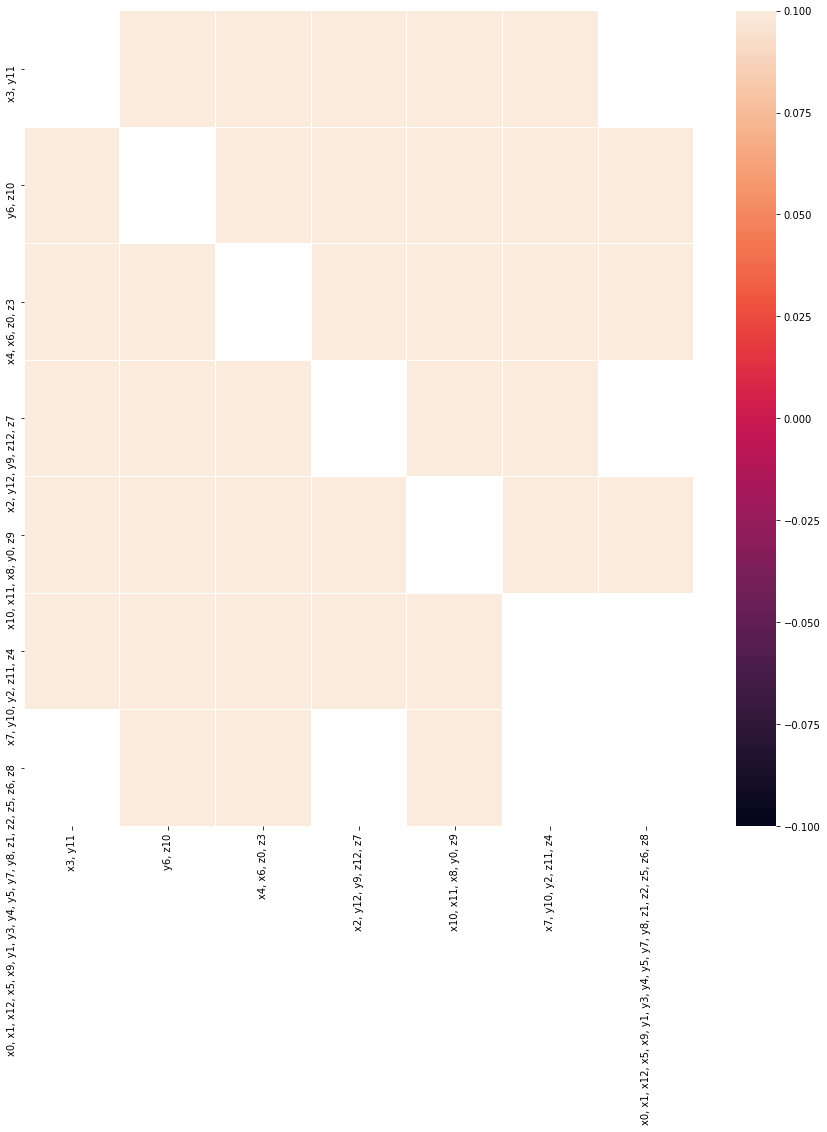

In [71]:
f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
sns.heatmap(np.log10(overlap), linewidth=0.05, ax=ax)

In [13]:
while len(solution_sets) > 1:
    solution_sets = solver.reduce_solution_sets_using_best_pair_intersections(solution_sets)

reduce x4, y8, z1 n=853 & y8, y9, z1 n=274: 100%|██████████| 37/37 [01:32<00:00,  2.49s/it]    
reduce x4, x6, y8, z1 n=853 & x6, y8, y9, z1 n=274: 100%|██████████| 33/33 [01:30<00:00,  2.73s/it]           
reduce x4, x6, y2, y8, z1 n=1024 & x6, y2, y8, y9, z1 n=548: 100%|██████████| 32/32 [03:42<00:00,  6.94s/it]          
reduce x1, x6, y2, y8, z1, z2 n=102 & x12, x6, y1, y2, y8, z1 n=336:  15%|█▌        | 4/26 [03:13<17:42, 48.30s/it]         


KeyboardInterrupt: 

In [155]:
ss = [next(iter(x)) for x in reduced]
acc = ss[0]
for i,s in enumerate(ss[1::]):
    n = acc.intersection(s)
    if n is None:
        print('failure', i)
        break
    acc = n

failure 1


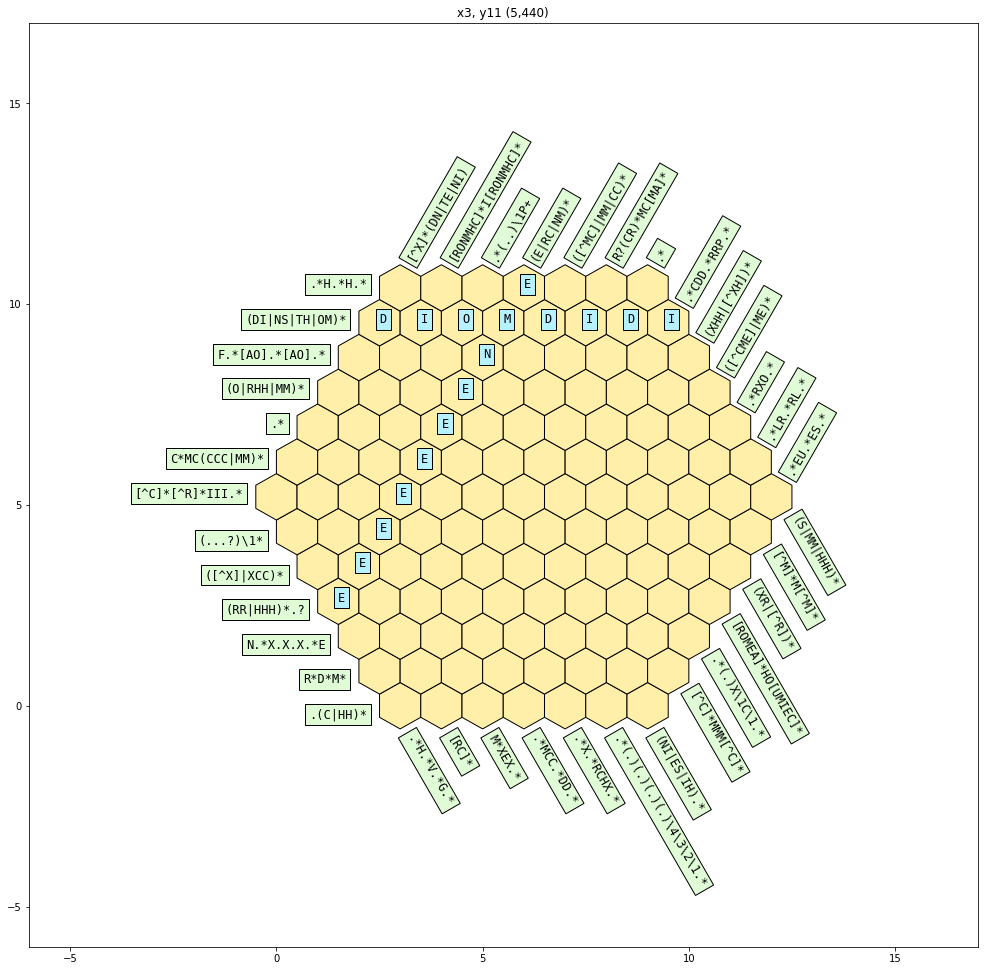

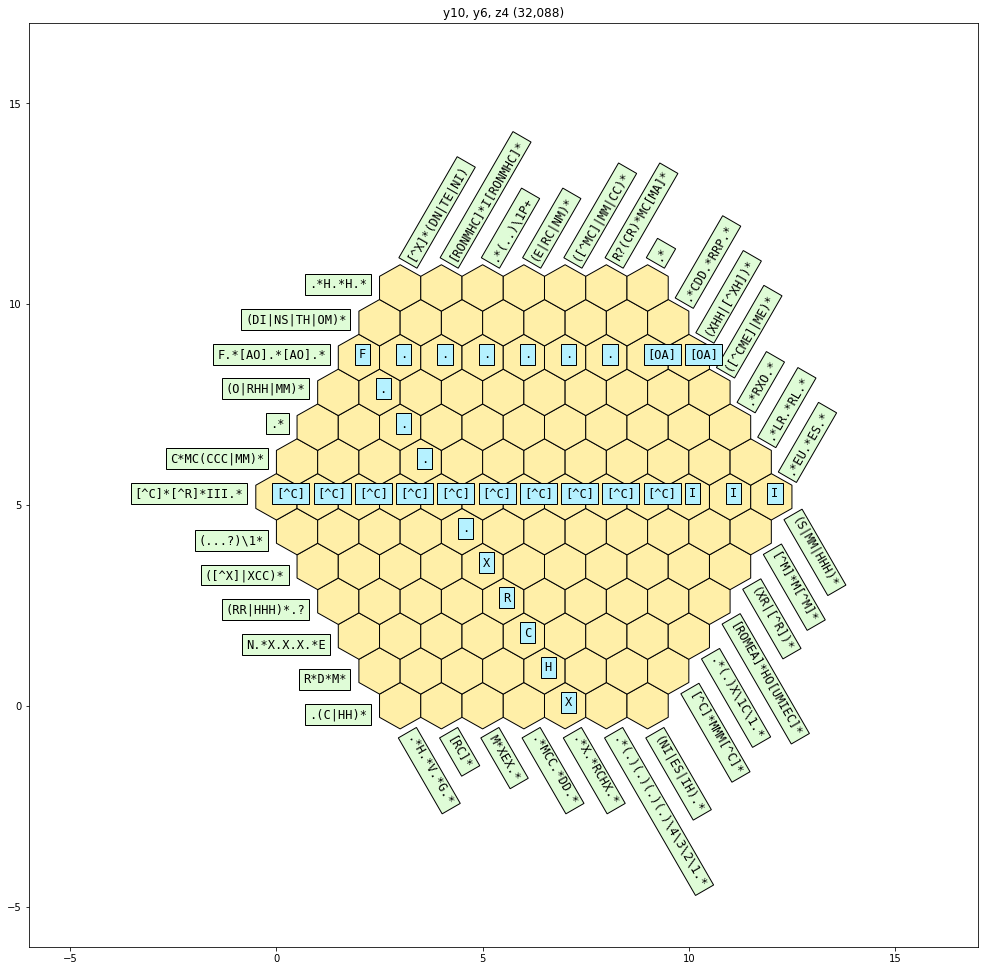

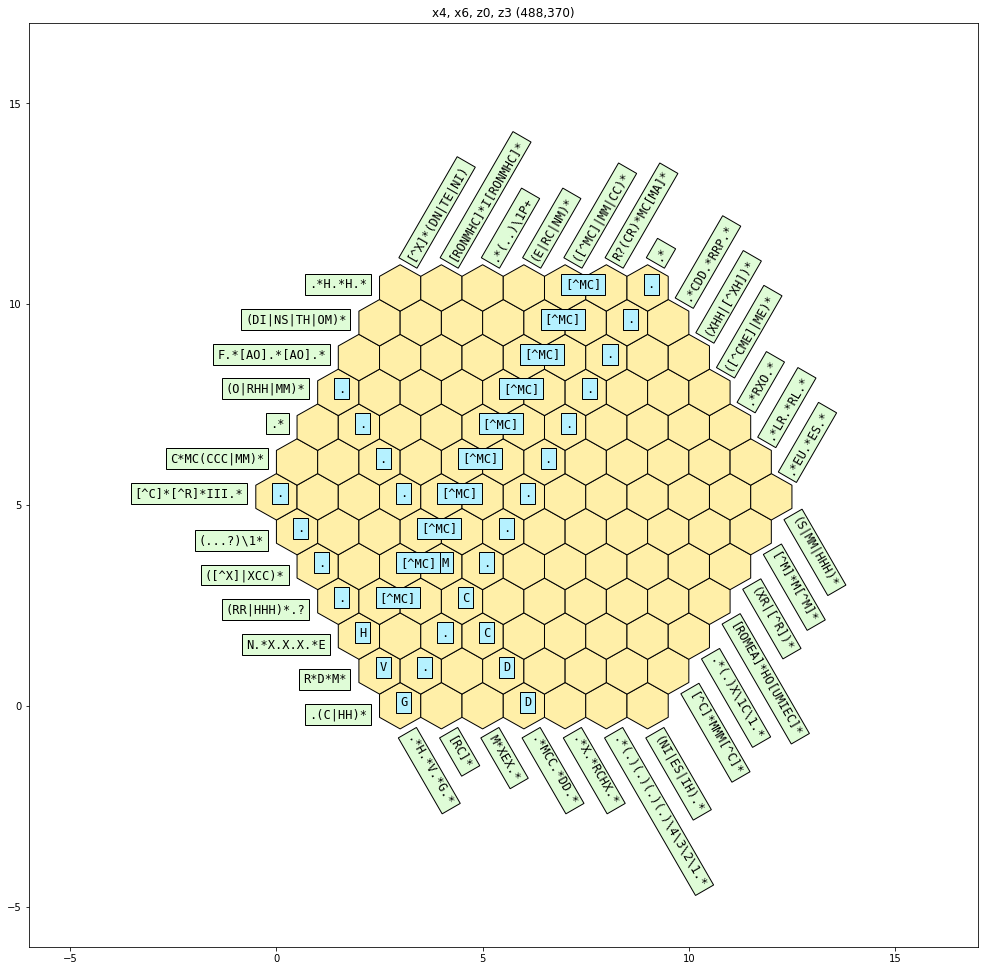

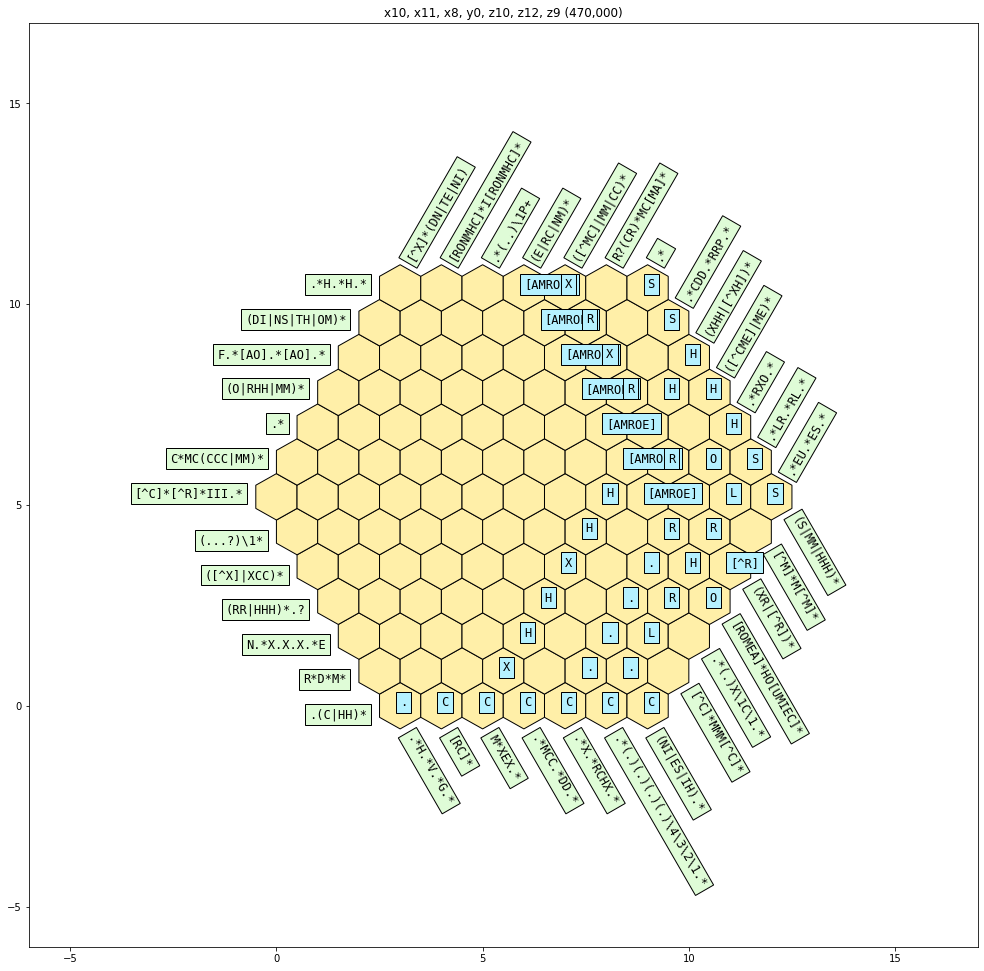

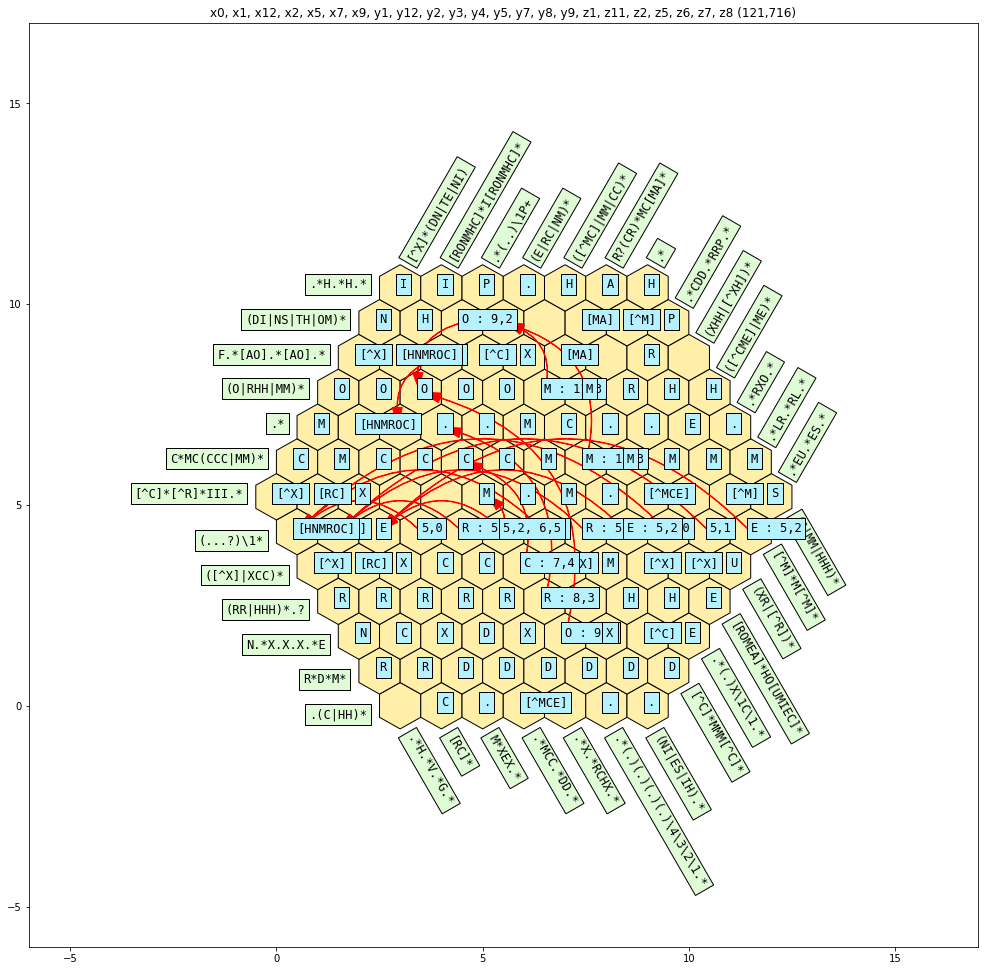

In [163]:
for ss in sorted(reduced, key=lambda ss: len(ss.cell_indices)):
    solver.draw_puzzle(fig_size=17, fontsize=12, solution=next(iter(ss)))
    plt.title(f'{ss.names_str} ({len(ss):,})')

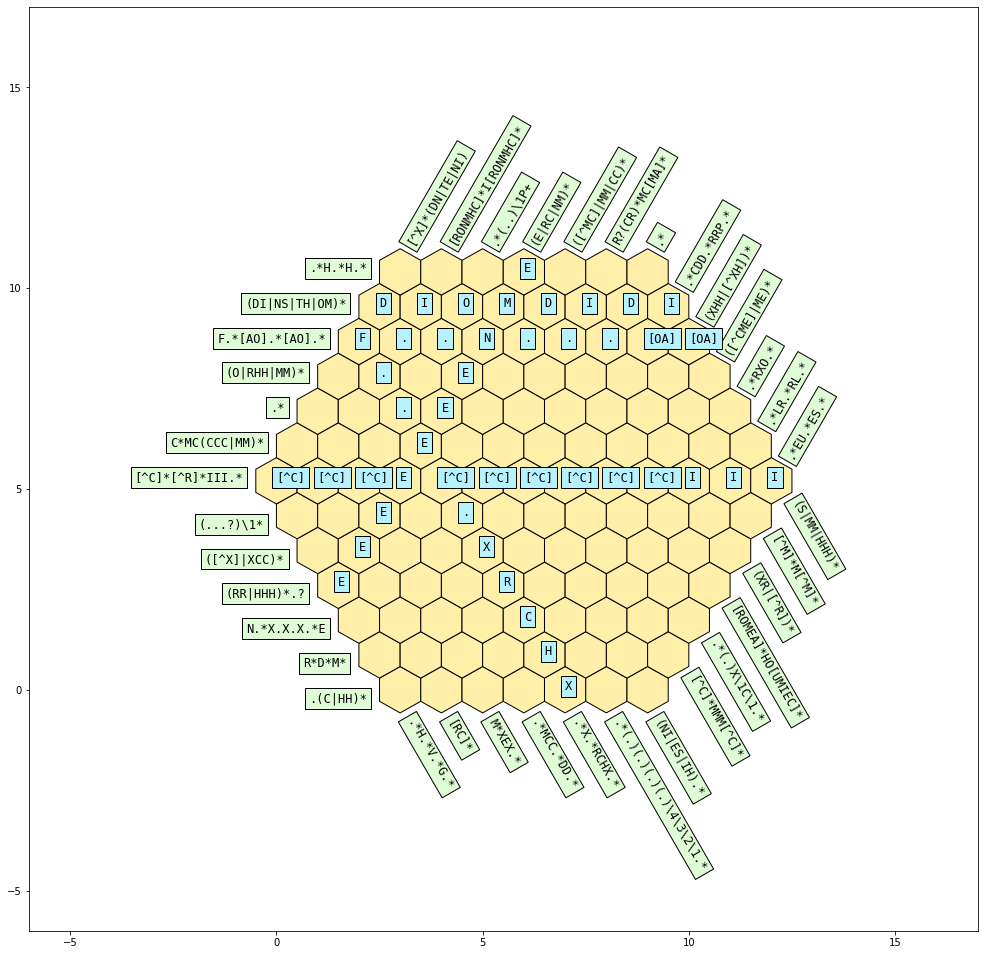

In [156]:
solution = max((s for ss in reduced for s in ss), key=lambda s: len(s.cells))
solver.draw_puzzle(fig_size=17, fontsize=12, solution=solution)

In [448]:
name_counts = pd.Series(Counter(n for s in solution_sets for n in s.names)).sort_index()
print(len(name_counts))
name_counts

39


x0      3
x1      1
x10     1
x11     1
x12     1
x2      1
x3      1
x4      1
x5      1
x6     17
x7      1
x8      1
x9      1
y0      1
y1      1
y10     1
y11     1
y12     1
y2      1
y3      1
y4      1
y5      1
y6      1
y7      1
y8      9
y9      1
z0      1
z1     12
z10     1
z11     1
z12     1
z2      1
z3      1
z4      1
z5      1
z6      1
z7      1
z8      1
z9      1
dtype: int64

In [451]:
pd.DataFrame([
    {'names': ','.join(sorted(s.names)),
     'size': len(s)}
    for s in solution_sets
]).sort_values('size', ascending=False)

names  size
17   x4,z1   853
9    x6,y9   274
16   x3,z1   256
11  x0,y11   192
21   x9,y8    89
6    y6,z1    63
35  x6,z10    55
37  x6,z12    44
20   x8,y8    41
25   x6,z0    35
4    y4,z1    32
29   x6,z4    28
1    y1,z1    28
19   x7,y8    28
10  x6,y10    28
28   x6,z3    21
12  x6,y12    21
7    y7,z1    20
23  x11,y8    15
18   x5,z1    10
24  x12,y8    10
32   x6,z7    10
34   x6,z9     9
0    y0,z1     8
36  x6,z11     8
33   x6,z8     7
3    y3,z1     7
14   x1,z1     7
27   x6,z2     7
22  x10,y8     7
15   x2,y8     5
30   x6,z5     5
31   x0,z6     3
13   x0,y8     3
5    x6,y5     2
2    y2,z1     2
8    x6,y8     1
26   x6,z1     1

<AxesSubplot:>

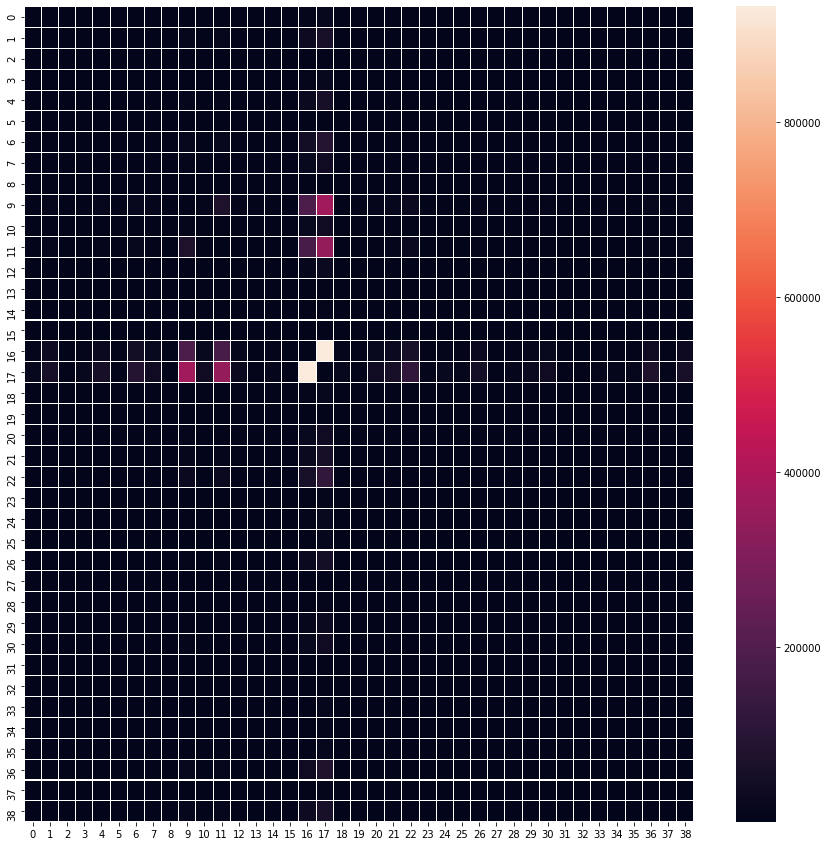

In [334]:
counts = np.array(string_solutions_df['count'])
counts_prod = counts[::, None] * counts[None, ::]
ix = np.arange(len(counts))
counts_prod[ix, ix] = counts
f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
sns.heatmap(counts_prod, linewidth=0.05, ax=ax)

In [351]:
def count_pair_solutions(i, j):
    if i==j:
        return counts[i]
    axis_i = strings_df['axis'].iloc[i]
    axis_j = strings_df['axis'].iloc[j]
    if axis_i == axis_j:
        return counts[i] * counts[j]
    
    lazy_solutions = solver.merge_two_solutions_seq(
        xs=solver.SolutionSource('i', string_solutions[i]),
        ys=solver.SolutionSource('j', string_solutions[j]),
        callback=lambda *args: None
    ).solutions
    return sum(1 for _ in lazy_solutions)

n = len(strings)
count_pair_solutions(5, 9)

548

In [359]:
axis_indexes = {axis:df.index.values for axis,df in strings_df.groupby('axis')}
axis_indexes

{'x': array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
 'y': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'z': array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])}

In [380]:
strings_df['name']

0      y0
1      y1
2      y2
3      y3
4      y4
5      y5
6      y6
7      y7
8      y8
9      y9
10    y10
11    y11
12    y12
13     x0
14     x1
15     x2
16     x3
17     x4
18     x5
19     x6
20     x7
21     x8
22     x9
23    x10
24    x11
25    x12
26     z0
27     z1
28     z2
29     z3
30     z4
31     z5
32     z6
33     z7
34     z8
35     z9
36    z10
37    z11
38    z12
Name: name, dtype: object

In [413]:
def compute_axis_intersection_solutions(axis_a, axis_b):
    sz = constants.size
    indexes_a = axis_indexes[axis_a]
    assert len(indexes_a) == sz
    indexes_b = axis_indexes[axis_b]
    assert len(indexes_b) == sz
    
    data = np.zeros(shape=(sz, sz), dtype=int)
    with tqdm(total=sz**2) as t:
        for i,index_a in enumerate(indexes_a):
            for j,index_b in enumerate(indexes_b):
                t.update()           
                data[i,j] = count_pair_solutions(index_a, index_b)
    return pd.DataFrame(data,
                        index=strings_df['name'].iloc[indexes_a],
                        columns=strings_df['name'].iloc[indexes_b])
    
data = compute_axis_intersection_solutions('y', 'z')

100%|██████████| 169/169 [00:01<00:00, 101.46it/s]


In [414]:
'{:,}'.format(data.max().max())

'9,590'

In [415]:
data.div(data.max().max()).mul(100).astype(int)

name   z0  z1  z2  z3  z4  z5  z6  z7  z8  z9  z10  z11  z12
name                                                        
y0      4   0   0   2   2   0   0   1   0   1    7    1    5
y1      9   0   2   6   7   2   1   4   3   4   25    3   20
y2      0   0   0   0   0   0   0   0   0   0    1    0    1
y3      2   0   0   1   1   0   0   0   0   0    6    1    5
y4     12   0   1   7   7   2   1   2   2   3   20    3   18
y5      0   0   0   0   0   0   0   0   0   0    1    0    0
y6     23   0   4  10  15   3   2   6   4   5   28    5   25
y7      9   0   0   4   5   1   0   1   1   1    6    0    3
y8      0   0   0   0   0   0   0   0   0   0    0    0    0
y9    100   2  20  47  60  14   8  23  14  15   64   12   19
y10    10   0   2   6   6   1   0   2   1   2   13    2    9
y11    93   2  18  56  74  13   2  21  16   5   56   18   29
y12     7   0   1   4   6   1   0   2   1   1   10    1    7

In [421]:
strings_df.reset_index().set_index('name').loc['z1']

index         27
axis           z
pattern    [RC]*
size           8
Name: z1, dtype: object

In [422]:
{a:i for i,a in enumerate([1,2,1,2,3])}

{1: 2, 2: 3, 3: 4}

In [423]:
any([])

False

In [420]:
counts[9]

274

<AxesSubplot:xlabel='name', ylabel='name'>

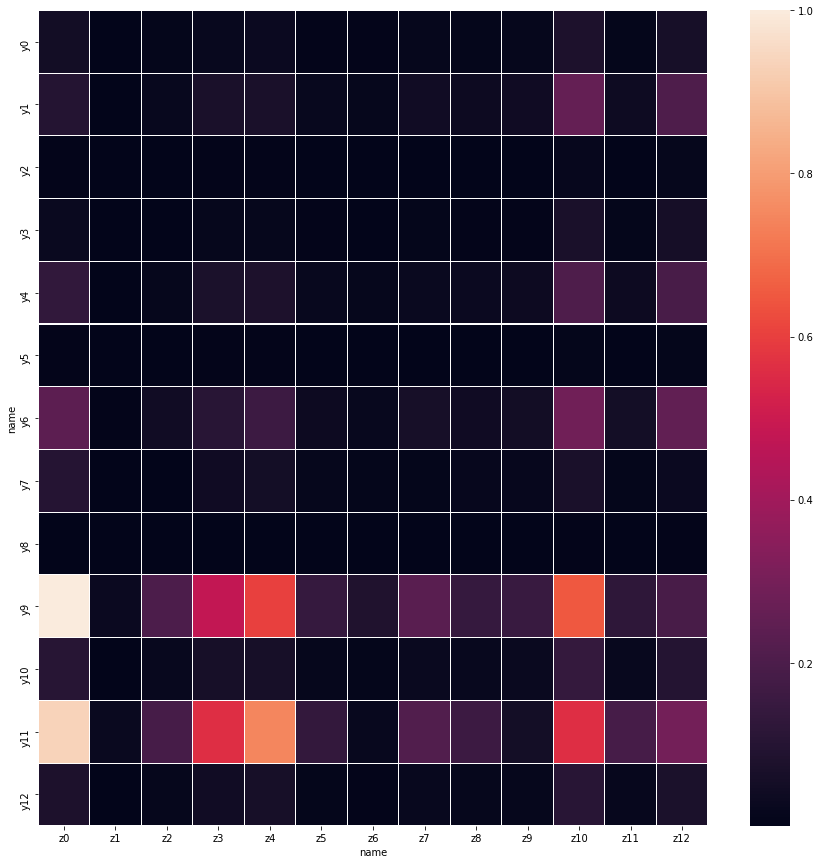

In [418]:
f = plt.figure(figsize=(15, 15))
ax = f.add_subplot(111)
sns.heatmap(data / data.max().max(), linewidth=0.05, ax=ax)

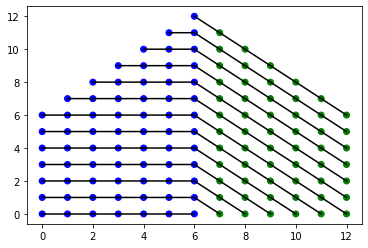

In [59]:
plt.plot()
mid = constants.size // 2
for i, s in enumerate(constants.x):
    points = []
    start = max(0, i-mid)
    end = min(i + mid + 1, constants.size)
    for j in range(start, end):
        x = j
        y = i if j <= mid else mid + i - j
        points.append([x, y, y >= solver.row_size(x),
                       'b' if j <= mid else 'g'])
    x, y, inv, c = map(np.array, zip(*points))
    plt.scatter(x, y, c=c)
    plt.plot(x, y, 'k-')
    if any(inv):
        plt.scatter(x[inv], y[inv], c='r', marker='*', s=200)

    

In [258]:
patterns = pd.DataFrame(
    [{'dim': dim, 'ix':ix, 'pat': pat}
        for dim, pats in constants.dims.items()
        for ix, pat in enumerate(pats)
    ])
patterns

dim  ix                       pat
0    x   0           [^X]*(DN|TE|NI)
1    x   1       [RONMHC]*I[RONMHC]*
2    x   2                .*(..)\1P+
3    x   3                (E|RC|NM)*
4    x   4            ([^MC]|MM|CC)*
5    x   5            R?(CR)*MC[MA]*
6    x   6                        .*
7    x   7              .*CDD.*RRP.*
8    x   8              (XHH|[^XH])*
9    x   9              ([^CME]|ME)*
10   x  10                   .*RXO.*
11   x  11                .*LR.*RL.*
12   x  12                .*EU.*ES.*
13   y   0                  .*H.*H.*
14   y   1            (DI|NS|TH|OM)*
15   y   2           F.*[AO].*[AO].*
16   y   3               (O|RHH|MM)*
17   y   4                        .*
18   y   5             C*MC(CCC|MM)*
19   y   6           [^C]*[^R]*III.*
20   y   7                 (...?)\1*
21   y   8               ([^X]|XCC)*
22   y   9               (RR|HHH)*.?
23   y  10               N.*X.X.X.*E
24   y  11                    R*D*M*
25   y  12                  .(C|HH)*
26   z   0               .*H.*V.*G.*
27   z   1                     [RC]*
28   z   2                   M*XEX.*
29   z   3               .*MCC.*DD.*
30   z   4               .*X.*RCHX.*
31   z   5  .*(.)(.)(.)(.)\4\3\2\1.*
32   z   6              (NI|ES|IH).*
33   z   7             [^C]*MMM[^C]*
34   z   8             .*(.)X\1C\1.*
35   z   9        [ROMEA]*HO[UMIEC]*
36   z  10                (XR|[^R])*
37   z  11               [^M]*M[^M]*
38   z  12               (S|MM|HHH)*

In [61]:
parsed = [sre_parse.parse(s) for s in patterns['pat']]

In [62]:
patterns['low'], patterns['high'] = zip(*(p.getwidth() for p in parsed))

In [ ]:
patterns

In [63]:
def gen_op_arg(pix, op, arg):
    yield dict(pix=pix, op=op, arg=arg)
    if op == sre_constants.SUBPATTERN:
        group, add_flags, del_flags, p = arg
        yield from gen_op_args(pix, p)
    elif op == sre_constants.MAX_REPEAT:
        mn, mx, p = arg
        yield from gen_op_args(pix, p)
    elif op == sre_constants.BRANCH:
        x, bs = arg
        assert x is None
        for b in bs:
            yield from gen_op_args(pix, b)
    elif op == sre_constants.IN:
        yield from gen_op_args(pix, arg)
        
        

def gen_op_args(pix, op_args):
    for op, arg in op_args:
        yield from gen_op_arg(pix, op, arg)
    

ops = pd.DataFrame([x
                    for pix,p in enumerate(parsed)
                    for x in gen_op_args(pix, p.data)],
                   dtype=object)
ops

pix           op                                                arg
0     0   MAX_REPEAT                (0, MAXREPEAT, [(NOT_LITERAL, 88)])
1     0  NOT_LITERAL                                                 88
2     0   SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(LITERAL, 68), (L...
3     0       BRANCH  (None, [[(LITERAL, 68), (LITERAL, 78)], [(LITE...
4     0      LITERAL                                                 68
..   ..          ...                                                ...
357  38      LITERAL                                                 77
358  38      LITERAL                                                 77
359  38      LITERAL                                                 72
360  38      LITERAL                                                 72
361  38      LITERAL                                                 72

[362 rows x 3 columns]

In [64]:
ops['op'].map(str).value_counts()

LITERAL        167
MAX_REPEAT      75
ANY             53
SUBPATTERN      22
BRANCH          14
IN              11
NOT_LITERAL      9
GROUPREF         8
NEGATE           3
Name: op, dtype: int64

In [65]:
ops.groupby('op').apply(lambda df : df.sample(min(5, len(df))))

pix           op                                                arg
op                                                                        
2  192  20          ANY                                               None
   169  17          ANY                                               None
   122  12          ANY                                               None
   214  22          ANY                                               None
   31    2          ANY                                               None
7  37    3       BRANCH  (None, [[(LITERAL, 69)], [(LITERAL, 82), (LITE...
   300  32       BRANCH  (None, [[(LITERAL, 78), (LITERAL, 73)], [(LITE...
   344  36       BRANCH  (None, [[(LITERAL, 88), (LITERAL, 82)], [(NOT_...
   45    4       BRANCH  (None, [[(IN, [(NEGATE, None), (LITERAL, 77), ...
   200  21       BRANCH  (None, [[(NOT_LITERAL, 88)], [(LITERAL, 88), (...
12 293  31     GROUPREF                                                  4
   294  31     GROUPREF                                                  3
   295  31     GROUPREF                                                  2
   321  34     GROUPREF                                                  1
   197  20     GROUPREF                                                  1
14 327  35           IN  [(LITERAL, 82), (LITERAL, 79), (LITERAL, 77), ...
   63    5           IN                     [(LITERAL, 77), (LITERAL, 65)]
   154  15           IN                     [(LITERAL, 65), (LITERAL, 79)]
   251  27           IN                     [(LITERAL, 82), (LITERAL, 67)]
   86    8           IN     [(NEGATE, None), (LITERAL, 88), (LITERAL, 72)]
17 210  22      LITERAL                                                 72
   139  14      LITERAL                                                 73
   155  15      LITERAL                                                 65
   59    5      LITERAL                                                 82
   166  16      LITERAL                                                 77
21 347  36  NOT_LITERAL                                                 82
   352  37  NOT_LITERAL                                                 77
   185  19  NOT_LITERAL                                                 82
   349  37  NOT_LITERAL                                                 77
   183  19  NOT_LITERAL                                                 67
22 47    4       NEGATE                                               None
   87    8       NEGATE                                               None
   94    9       NEGATE                                               None
26 285  31   SUBPATTERN                           (1, 0, 0, [(ANY, None)])
   175  18   SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(LITERAL, 67), (L...
   206  22   SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(LITERAL, 82), (L...
   91    9   SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(IN, [(NEGATE, No...
   343  36   SUBPATTERN  (1, 0, 0, [(BRANCH, (None, [[(LITERAL, 88), (L...
42 54    5   MAX_REPEAT                            (0, 1, [(LITERAL, 82)])
   194  20   MAX_REPEAT                              (0, 1, [(ANY, None)])
   353  38   MAX_REPEAT  (0, MAXREPEAT, [(SUBPATTERN, (1, 0, 0, [(BRANC...
   205  22   MAX_REPEAT  (0, MAXREPEAT, [(SUBPATTERN, (1, 0, 0, [(BRANC...
   90    9   MAX_REPEAT  (0, MAXREPEAT, [(SUBPATTERN, (1, 0, 0, [(BRANC...

In [66]:
for _,row in ops[ops['op'] == sre_constants.IN].iterrows():
    display(row.to_frame().T)
    display(patterns.iloc[row['pix']].to_frame().T)
    display(row['arg'])
    print('-' * 80)

pix  op                                                arg
11   1  IN  [(LITERAL, 82), (LITERAL, 79), (LITERAL, 78), ...

dim ix                  pat low        high
1   x  1  [RONMHC]*I[RONMHC]*   1  4294967295

[(LITERAL, 82),
 (LITERAL, 79),
 (LITERAL, 78),
 (LITERAL, 77),
 (LITERAL, 72),
 (LITERAL, 67)]

--------------------------------------------------------------------------------


pix  op                                                arg
20   1  IN  [(LITERAL, 82), (LITERAL, 79), (LITERAL, 78), ...

dim ix                  pat low        high
1   x  1  [RONMHC]*I[RONMHC]*   1  4294967295

[(LITERAL, 82),
 (LITERAL, 79),
 (LITERAL, 78),
 (LITERAL, 77),
 (LITERAL, 72),
 (LITERAL, 67)]

--------------------------------------------------------------------------------


pix  op                                             arg
46   4  IN  [(NEGATE, None), (LITERAL, 77), (LITERAL, 67)]

dim ix             pat low        high
4   x  4  ([^MC]|MM|CC)*   0  4294967295

[(NEGATE, None), (LITERAL, 77), (LITERAL, 67)]

--------------------------------------------------------------------------------


pix  op                             arg
63   5  IN  [(LITERAL, 77), (LITERAL, 65)]

dim ix             pat low        high
5   x  5  R?(CR)*MC[MA]*   2  4294967295

[(LITERAL, 77), (LITERAL, 65)]

--------------------------------------------------------------------------------


pix  op                                             arg
86   8  IN  [(NEGATE, None), (LITERAL, 88), (LITERAL, 72)]

dim ix           pat low        high
8   x  8  (XHH|[^XH])*   0  4294967295

[(NEGATE, None), (LITERAL, 88), (LITERAL, 72)]

--------------------------------------------------------------------------------


pix  op                                                arg
93   9  IN  [(NEGATE, None), (LITERAL, 67), (LITERAL, 77),...

dim ix           pat low        high
9   x  9  ([^CME]|ME)*   0  4294967295

[(NEGATE, None), (LITERAL, 67), (LITERAL, 77), (LITERAL, 69)]

--------------------------------------------------------------------------------


pix  op                             arg
149  15  IN  [(LITERAL, 65), (LITERAL, 79)]

dim ix              pat low        high
15   y  2  F.*[AO].*[AO].*   3  4294967295

[(LITERAL, 65), (LITERAL, 79)]

--------------------------------------------------------------------------------


pix  op                             arg
154  15  IN  [(LITERAL, 65), (LITERAL, 79)]

dim ix              pat low        high
15   y  2  F.*[AO].*[AO].*   3  4294967295

[(LITERAL, 65), (LITERAL, 79)]

--------------------------------------------------------------------------------


pix  op                             arg
251  27  IN  [(LITERAL, 82), (LITERAL, 67)]

dim ix    pat low        high
27   z  1  [RC]*   0  4294967295

[(LITERAL, 82), (LITERAL, 67)]

--------------------------------------------------------------------------------


pix  op                                                arg
327  35  IN  [(LITERAL, 82), (LITERAL, 79), (LITERAL, 77), ...

dim ix                 pat low        high
35   z  9  [ROMEA]*HO[UMIEC]*   2  4294967295

[(LITERAL, 82), (LITERAL, 79), (LITERAL, 77), (LITERAL, 69), (LITERAL, 65)]

--------------------------------------------------------------------------------


pix  op                                                arg
336  35  IN  [(LITERAL, 85), (LITERAL, 77), (LITERAL, 73), ...

dim ix                 pat low        high
35   z  9  [ROMEA]*HO[UMIEC]*   2  4294967295

[(LITERAL, 85), (LITERAL, 77), (LITERAL, 73), (LITERAL, 69), (LITERAL, 67)]

--------------------------------------------------------------------------------


In [116]:
s.name

''

In [98]:
solutions = [next(iter(solver.Solution.generate_solutions(s))) for s in strings]
a = solutions[0]
b = solutions[1]

In [ ]:
for i,row in patterns.sample(n=10, random_state=0xCAFE).iterrows():
    display(row.to_frame().T)
    parsed[i].dump()
    print('-'*80)

In [ ]:
p = sre_parse.parse(constants.x[0])
p.dump()

In [ ]:
p.data

In [ ]:
p.getwidth()

In [ ]:
PatchCollection?

In [ ]:
[solver.row_size(i) for i in range(constants.size)]

In [ ]:
x,y = MarkerPath.unit_regular_polygon(6).vertices.T
plt.plot(x,y)

In [ ]:
1 / (x.max() - x.min())

In [ ]:
1 / (y.max() - y.min())

In [ ]:
0.577 / 0.5

In [ ]:
unit_hex = plt.Polygon(MarkerPath.unit_regular_polygon(6).vertices,
                       edgecolor='k', linewidth=1, fill=True, facecolor='#ffefa8')
unit_hex.set_transform(Affine2D().scale(0.577))

vscale = 1 / 1.154

def position(i, j):
    x = j + (constants.size - solver.row_size(i)) / 2.0
    y = i * vscale
    return x, y


patches = []
for i in range(constants.size):
    for j in range(solver.row_size(i)):
        x,y = position(i, j)
        patch = copy.copy(unit_hex)
        patch.set_transform(patch.get_transform() + Affine2D().translate(x, y))
        patches.append(patch)
        
p = PatchCollection(patches, match_original=True)


f = plt.figure(figsize=(11, 11))
ax = f.add_subplot(111)

ax.add_collection(p)

def text(x, y, s, **kwds):
    ax.text(x, y, s, fontsize=13, bbox=dict(facecolor='#dffcd7', edgecolor='k'), **kwds)

mid = constants.size // 2
for i,v in enumerate(constants.x[:mid + 1:]):
    x, y = position(12, i)
    text(x + 0.1, y + 0.7, v, rotation=60)
    
for i,v in enumerate(constants.x[mid + 1::]):
    r = constants.size - i - 1
    x, y = position(r, solver.row_size(r))
    text(x - 0.3, y - 0.3, v, rotation=60)
    
for i,v in enumerate(constants.y[:mid + 1:]):
    r = constants.size - i - 1
    x, y = position(r, 0)
    text(x - 0.8, y, v, horizontalalignment='right')
    
for i,v in enumerate(constants.y[mid + 1::]):
    r = mid - i - 1
    x, y = position(r, 0)
    text(x - 0.8, y - 0.3, v, horizontalalignment='right')
    
for i,v in enumerate(constants.z[:mid + 1:]):
    x, y = position(0, i)
    text(x + 0.15, y - 0.8, v, rotation=-60, rotation_mode='anchor')
    
for i,v in enumerate(constants.z[mid + 1::]):
    x, y = position(i, solver.row_size(i))
    text(x, y + 0.3, v, rotation=-60, rotation_mode='anchor')

ax.set_xlim(-5, 16)
ax.set_ylim(-5, 16)


In [ ]:
patch._transform._mtx

In [ ]:
vars(patch)

In [ ]:
ax.add_patch??